In [1]:
import deepSI
import numpy as np
from matplotlib import pyplot as plt
import Systems

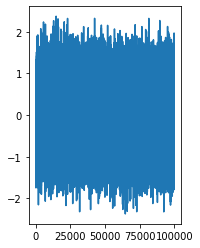

In [2]:
u = 0.6*deepSI.deepSI.exp_design.multisine(100000, pmax=49999, n_crest_factor_optim=20)#49999
#u = np.clip(u*1.5, -3, 3)
plt.subplot(1,2,1)
plt.plot(u[:])

In [3]:
system = Systems.LTI(sigma_n=[0.01])
data = system.apply_experiment(deepSI.System_data(u=u))

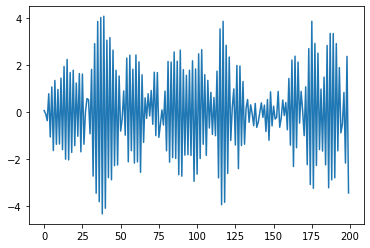

In [10]:
plt.plot(data.y[:200])

In [ ]:
Spower = np.sum(np.square(data.y), axis=0)/data.y.shape[0]
Npower = np.sum(np.square(np.random.normal(0, 0.1, (10000,))), axis=0)/10000
Spower, Npower, 10*np.log10(Spower / Npower)

In [ ]:
I_enc = deepSI.fit_systems.SS_encoder_general(nx=4, na=4, nb=4, na_right=1)

In [ ]:
train, test = data.train_test_split(split_fraction=0.2)
train, val  = train.train_test_split(split_fraction=0.25)

In [ ]:
I_enc.fit(train_sys_data=train, val_sys_data=val, epochs=20, batch_size=256, loss_kwargs={'nf':150})

In [ ]:
I_enc.save_system("systems/LtiTanh_nab_4_Ru_4_SNR_25_e20")

In [ ]:
I_enc.checkpoint_load_system('_last')
plt.semilogy(I_enc.batch_id[:250],I_enc.Loss_val[:250],label='validation loss')
plt.semilogy(I_enc.batch_id[:250],I_enc.Loss_train[:250]**0.5,label='trains loss')
plt.grid()
plt.legend()

In [ ]:
test_ss_enc = I_enc.apply_experiment(test)

In [ ]:
print(f'NRMS simulation SS linear  {test_ss_enc.NRMS(test):.2%}')

plt.plot(test.y, label='System')
plt.plot(test.y - test_ss_enc.y, label='Error')
plt.legend(loc='upper right')

In [ ]:
# I_enc = deepSI.load_system("systems/LtiTanh_nab_4_Ru_20_e50")